In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import re

In [2]:
raw_data = pd.read_csv('GBBO Data Set - Bakes.csv')
raw_data.head()

,Season,Week Number,Baker,Week Name,Bake,Signature Bake,Signature Time Allotment (hours),Signature Sweet (1) or Savory (0),Signature Quantity,Signature Handshake,...,Showstopper Sweet (1) or Savory (0),Showstopper Quantity,Showstopper Handshake,Favorite,Least Favorite,Star Baker,Eliminated,Competed,Winner,UK viewers (millions)
0,Series 1,1,Annetha,Cake,Cake,Light Jamaican Black Cake with Strawberries an...,3,1,1,0,...,1,1,0,1.0,0,0,0,1,0,NaN
1,Series 1,1,David,Cake,Cake,Chocolate Orange Cake,3,1,1,0,...,1,1,0,0.0,1,0,0,1,0,NaN
2,Series 1,1,Edd,Cake,Cake,Caramel Cinnamon and Banana Cake,3,1,1,0,...,1,1,0,0.0,0,0,0,1,1,NaN
3,Series 1,1,Jasminder,Cake,Cake,Fresh Mango and Passion Fruit Hummingbird Cake,3,1,1,0,...,1,1,0,0.0,0,0,0,1,0,NaN
4,Series 1,1,Jonathan,Cake,Cake,Carrot Cake with Lime and Cream Cheese Icing,3,1,1,0,...,1,1,0,0.0,0,0,0,1,0,NaN


In [3]:
raw_data.dtypes

Season                                  object
Week Number                              int64
Baker                                   object
Week Name                               object
Bake                                    object
Signature Bake                          object
Signature Time Allotment (hours)        object
Signature Sweet (1) or Savory (0)       object
Signature Quantity                      object
Signature Handshake                      int64
Technical Bake                          object
Technical Recipe Writer                 object
Technical Time Allotment (hours)        object
Technical Sweet (1) or Savory (0)      float64
Technical Quantity                      object
Technical Rank                         float64
Showstopper                             object
Showstopper Bake                        object
Showstopper Time Allotment (hours)      object
Showstopper Sweet (1) or Savory (0)     object
Showstopper Quantity                    object
Showstopper H

In [4]:
clean_data = raw_data[["Season","Week Number","Baker","Bake","Signature Bake"]]
clean_data["Sweet"] = raw_data["Signature Sweet (1) or Savory (0)"].astype("bool")
clean_data["Handshake"] = raw_data["Signature Handshake"].astype("bool")
clean_data = pd.concat([clean_data,raw_data[["Favorite","Least Favorite","Star Baker","Eliminated","Winner"]].astype("bool")], axis=1)
print("Total entries: " + str(len(clean_data.index)))
clean_data.head()

Total entries: 823


,Season,Week Number,Baker,Bake,Signature Bake,Sweet,Handshake,Favorite,Least Favorite,Star Baker,Eliminated,Winner
0,Series 1,1,Annetha,Cake,Light Jamaican Black Cake with Strawberries an...,True,False,True,False,False,False,False
1,Series 1,1,David,Cake,Chocolate Orange Cake,True,False,False,True,False,False,False
2,Series 1,1,Edd,Cake,Caramel Cinnamon and Banana Cake,True,False,False,False,False,False,True
3,Series 1,1,Jasminder,Cake,Fresh Mango and Passion Fruit Hummingbird Cake,True,False,False,False,False,False,False
4,Series 1,1,Jonathan,Cake,Carrot Cake with Lime and Cream Cheese Icing,True,False,False,False,False,False,False


In [5]:
#make dictionary of indecies where each word occurs
titles = clean_data["Signature Bake"]
words = {}
words_in_titles = []
numErrors = 0
for i in range(len(titles)):
    title = titles[i]
    try:
        if(type(title) is str):
            new_words = re.split('( |/|\t|\n|-)', title)
            words_in_titles.append(new_words)
            for word in new_words:
                if word in words:
                    words[word].append(i)
                else:
                    words[word] = [i]

    except Exception as e:
        numErrors = numErrors + 1
        print(e)
        print(title)
        break

print(words)

3, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703], 'Stromboli': [64], 'flavored': [64], 'Mozzarella,': [64], 'Picante': [64], "Ploughman's": [65], 'Rye': [66, 195, 270, 275, 276, 277, 279, 281, 282, 348], 'Seed': [66, 114, 160, 181, 192, 242, 246, 330, 401, 611], 'Salt': [67, 193, 350], 'Peppercorn': [67, 128], 'Egyptian': [68], 'Dukkah': [68, 110], 'Mixed': [68, 218], 'Spices': [68], 'Stem': [69, 638, 642], 'Nuts': [69], 'Strawberry': [70, 91, 146, 261, 283, 471, 595, 617, 819], 'Melts': [70], 'Christmas': [71, 378, 435, 620, 636, 669, 784], 'Marzipan': [71, 216, 609, 622], 'Lebkuchen': [72], 'Lavender': [73, 122, 716], 'Melting': [74], 'Moments': [74], 'Oat': [75], 'Chip': [76], 'Biscotti': [76, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345], 'Chestnut': [78, 129], 'Brown': [79], 'Down': [79, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 365, 788], 'Asparagus': [80], 'Family': [83, 636, 727], 'Father': [84], "Christmas'": [84], 'Baked': [84, 85, 86, 87, 88],

In [6]:
print(words_in_titles[0:4])

[['Light', ' ', 'Jamaican', ' ', 'Black', ' ', 'Cake', ' ', 'with', ' ', 'Strawberries', ' ', 'and', ' ', 'Cream'], ['Chocolate', ' ', 'Orange', ' ', 'Cake'], ['Caramel', ' ', 'Cinnamon', ' ', 'and', ' ', 'Banana', ' ', 'Cake'], ['Fresh', ' ', 'Mango', ' ', 'and', ' ', 'Passion', ' ', 'Fruit', ' ', 'Hummingbird', ' ', 'Cake']]


In [7]:
word_counts = {}
for word in words.keys():
    word_counts[word] = len(words[word])

word_data = pd.DataFrame()
word_data["Word"] = word_counts.keys()
word_data["Total Count"] = word_counts.values()
word_data.head(20)

,Word,Total Count
0,Light,1
1,,3809
2,Jamaican,3
3,Black,13
4,Cake,118
5,with,55
6,Strawberries,2
7,and,345
8,Cream,18
9,Chocolate,65


In [8]:
def drop_rows(mask, data):
    match_inds = data.index[mask]

    print("Dropping:\n" + str(data.loc[mask]))
    return data.drop(match_inds)

In [9]:
#match and drop any rows that are purely non-word characters
matches = word_data['Word'].apply(lambda string : re.search(r'^\W$',string))
match_mask = matches.apply(lambda match : match is not None)
word_data = drop_rows(match_mask, word_data)
word_data.reset_index(inplace=True)

Dropping:
    Word  Total Count
1                3809
83     &           73
217   \t           18
226    /           49
233   \n           26
326    -           17


In [10]:
#match and keep only words that start with a capital letter
matches = word_data['Word'].apply(lambda string : re.match(r'\W?[A-Z]', string))
match_mask = matches.apply(lambda match : match is None)
word_data = drop_rows(match_mask, word_data)
word_data.reset_index(drop=True, inplace=True)

Dropping:
     index      Word  Total Count
4        5      with           55
6        7       and          345
39      40   freshly            1
40      41      made            1
66      67                   1080
162    164  flavored            1
276    281        in            2
277    282         a            5
312    317   manchet            1
338    344        de            1
390    396       the            2
423    429         y            1
429    435     cream            1
461    467        on            1
508    514        au            5
521    527        an            1
555    561        of           11
612    618      away            1
631    637       for            2
753    759        vs            1
844    850     nutty            1
873    879        to            2
880    886      chip            1
886    892     1920s            1
988    994        ét            1


In [11]:
word_data.sort_values("Total Count", ascending=False, inplace=True)
print("Total words after cleaning: " + str(len(word_data.index)))
word_data.head(20)

Total words after cleaning: 972


,index,Word,Total Count
3,4,Cake,118
6,9,Chocolate,65
7,10,Orange,45
50,55,Ginger,40
35,38,Lemon,38
86,93,Pie,36
304,318,Buns,30
73,79,Apple,28
60,65,Bread,28
43,48,Biscuits,24


In [12]:
print("The dataframe has " + str(len(word_data['Total Count'])) + " entries.")
print("There are " + str(len(word_data[word_data['Total Count'] > 10])) + " entries with counts greater than 10.")

The dataframe has 972 entries.
There are 66 entries with counts greater than 10.


{'Series 1': 2,
 'Series 2': 5,
 'Series 3': 5,
 'Series 4': 5,
 'Series 6': 3,
 'Series 7': 5,
 'Series 9': 11,
 'Series 10': 2,
 'Series 11': 2}

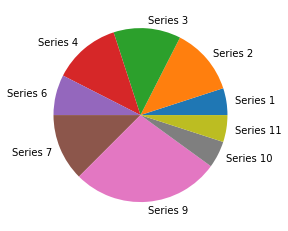

In [31]:
#get breakdown of some metric for a given flavor
flavor = 'Ginger'
metric = 'Season'

metric_values = {}
for i in words[flavor]:
    value = clean_data[metric].loc[i]
    if value not in metric_values:
        metric_values[value] = 1
    else:
        metric_values[value] = metric_values[value] + 1

pp.pie(metric_values.values(), labels=metric_values.keys())
metric_values

The first proportion is calculated as 10/65.
The second proportion is calculated as 16/118.


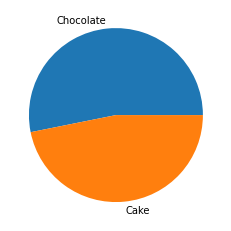

In [53]:
#comparison of proportions for two flavors
flavor1 = 'Chocolate'
flavor2 = 'Cake'
metric = 'Eliminated'

metric_data = clean_data[metric]
flavor1_data = metric_data[words[flavor1]]
flavor2_data = metric_data[words[flavor2]]
print(f'The first proportion is calculated as {np.sum(flavor1_data)}/{len(flavor1_data)}.')
prop1 = np.sum(flavor1_data)/len(flavor1_data)
print(f'The second proportion is calculated as {np.sum(flavor2_data)}/{len(flavor2_data)}.')
prop2 = np.sum(flavor2_data)/len(flavor2_data)

plot = pp.pie([prop1*100, prop2*100], labels=[flavor1, flavor2])
pp.show(plot)